## Lab Part 2
## Spherical Harmonics


In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm
from scipy.special import lpmv


## Spherical Harmonics in python
scipy has sph_harm:
    
<img src=sph_harm.png width=300>

l is the degree and m is the order of the term.<br>
python flips the convention for phi and theta for longitude and co-latitude. We will use the normal definitions in the code below.<br>

When constructing a scalar field from a sum of spherical harmonics, we usually use the associated Legendre polynomial:

<img src="lpmv.png" width=700>

From the MIT Gravity lecture notes, the function is a summation that only requires knowledge of a set of coefficients for each (l,m):

<img src="sum.png" width=600>

Rather than A and B, the coefficients are often called $C_{lm}$ and $S_{lm}$ to denote the prefactor for the cosine and sine terms.

Finally, all you need to know is how the function is normalized to retrieve a field from spherical harmonics. This step, alas, is not trivial. See the various normalizations described in Wieczorek, Mark A., and Matthias Meschede. "Shtools: Tools for working with spherical harmonics." Geochemistry, Geophysics, Geosystems 19.8 (2018): 2574-2592.


Text(0.5, 0.92, 'l=10 m=2')

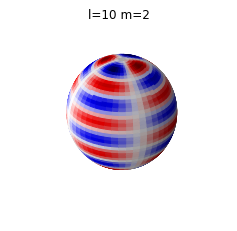

In [2]:
# play with the spherical harmonics function Y of degree l and order m
# -->> change these values
l, m = 10, 2

# set up phi and theta angles for the sphere
# sph_harm defines these variables the opposite from geoscientists, so note
# that the help file for sph_harm has the names of the variables switched
n_phi = 200
n_theta = 100
phi = np.linspace(0, 2*np.pi, n_phi) # longitude
theta = np.linspace(0, np.pi, n_theta) # colatitude must between 0 and pi
theta, phi = np.meshgrid(theta,phi)

# The Cartesian coordinates of the unit sphere
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Calculate the spherical harmonic function Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, phi, theta).real # ask for just the real component of the complex function
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  facecolors=cm.seismic(fcolors))
# Turn off the axis planes
ax.set_axis_off()
ax.set_title('l='+str(l)+' m='+str(m))


The main components of these orthogonal functions have specific terms (from Wieczorek and Meschede):
    
<img src="terms.png" width=800>

# For homework, remake the figure from MIT lecture notes Figure 2.14

Something like this (but you do not have to use the subplot layout):

<img src="MIT-fig2.14.png">

In [3]:
# For homework, remake the figure from MIT lecture notes Figure 2.14
l_max = 5
p_max = (l_max + 1) * (l_max + 2) // 2
fcolors = np.zeros((p_max, n_phi, n_theta))
for l in range(l_max+1):
    for m in range(l+1):
        p = l * (l + 1) // 2 + m  # reshape (l, m) to (p)
        fcolors[p, :, :] = sph_harm(m, l, phi, theta).real  # ask for just the real component of the complex function
        fmax, fmin = fcolors[p, :, :].max(), fcolors[p, :, :].min()
        if p == 0:
            fcolors[p, :, :] /= fmax
        else:
            fcolors[p, :, :] = (fcolors[p, :, :] - fmin)/(fmax - fmin)  # normalize to 1.0

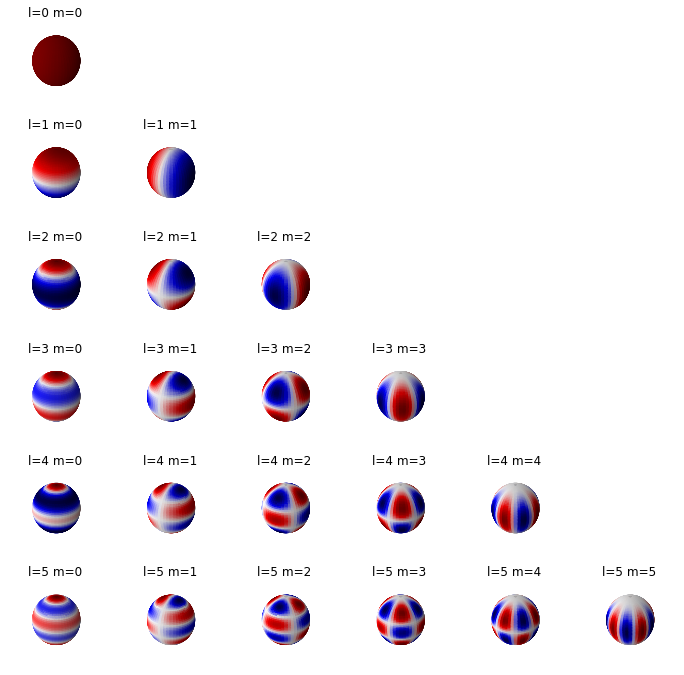

In [4]:
# plot result, generate a (l+1) * (l+1) subplots
fig = plt.figure(figsize=plt.figaspect(1.)*(l_max+1)/2.0)  # set figure size so that each subplots has plt.figaspect(1.)/2.0 size
for l in range(l_max+1):
    for m in range(l+1):
        p = l * (l + 1) // 2 + m  # reshape (l, m) to (p)
        index = (l_max + 1) * l + m + 1  # index in subplots, l+1 th row, m+1 th column
        ax = fig.add_subplot(l_max+1, l_max+1, (l_max+1)*l+m+1, projection='3d')
        ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors[p, :, :]))
        # Turn off the axis planes
        ax.set_axis_off()
        ax.set_title('l='+str(l)+' m='+str(m)) 
fig.show()

## Legendre polynomials

Now let's examine the associated Legendre polynomials with order m=0.<br>
The MIT notes have this plot:

<img src="legendre.png" width=400>


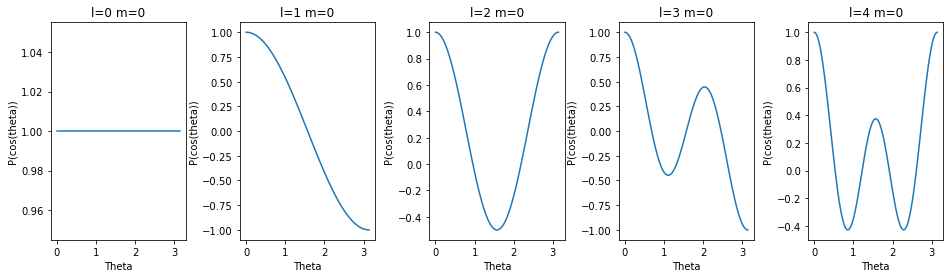

In [5]:
# make figure from MIT lecture notes Figure 2.13 Legendre polynomials
# angles defined in Figure 2.12
theta = np.linspace(0, np.pi, 100) # colatitude
z = np.cos(theta)
fig = plt.figure(figsize=[16,4]) # wide becase several subplots
for l in range(0,5):
    m=0
    index=l+1
    #print(m,l,index)
    # Calculate the associated Legendre polynomial
    result = lpmv(m, l, z) 
    ax = fig.add_subplot(1,5,index) # index gives the position of the plot
    fig.subplots_adjust(wspace = 0.4)
    ax.plot(theta,result)
    ax.set_title('l='+str(l)+' m='+str(m))
    ax.set_xlabel('Theta')
    ax.set_ylabel('P(cos(theta))')

## Now read in the coefficients for the Martian gravity field

In [6]:
## Now the coefficients C and S are the prefactors to cosine and sine terms in the spherical harmonics sum

# read in the Mars gravity spherical harmonics
marsgravheader = np.loadtxt('gmm3_120_sha.tab',max_rows=1,delimiter=',')
print(marsgravheader) # reference radius in km; GM in  km**3/s**2
marsgravcoefs = np.loadtxt('gmm3_120_sha.tab',skiprows=1,delimiter=',')
marsgravcoefs.shape
print(marsgravcoefs[0:5,:]) # l, m, C, S, sig-C, sig-S

phi = np.linspace(0, 2*np.pi, 200) # longitude
theta = np.linspace(0, np.pi, 100) # colatitude
z = np.cos(theta)
a=marsgravheader[0]
GM=marsgravheader[1]




[3.39600000e+03 4.28283729e+04 2.38000000e+03 1.20000000e+02
 1.20000000e+02 1.00000000e+00 0.00000000e+00 0.00000000e+00]
[[ 2.00000000e+00  0.00000000e+00 -8.75021132e-04  0.00000000e+00
   1.25000000e-11  0.00000000e+00]
 [ 2.00000000e+00  1.00000000e+00  5.90314960e-10 -4.94336174e-11
   5.21000000e-12  5.23000000e-12]
 [ 2.00000000e+00  2.00000000e+00 -8.46359039e-05  4.89346259e-05
   2.41000000e-12  2.42000000e-12]
 [ 3.00000000e+00  0.00000000e+00 -1.18960349e-05  0.00000000e+00
   8.44000000e-12  0.00000000e+00]
 [ 3.00000000e+00  1.00000000e+00  3.80429811e-06  2.51773217e-05
   5.25000000e-12  5.31000000e-12]]


And now we should use some pre-made tools to read in spherical harmonics coefficients.....<p>

END PART 2
